In [188]:
import cv2
import numpy as np

In [189]:
import matplotlib.pyplot as plt

In [190]:
import os
import json 

=====================================================

## 基本配置

In [191]:
dataset_path = '../pancreas/backup1-seg-dataset/'
new_dataset_path = '../pancreas/tumor-seg-dataset/'

if os.path.exists(new_dataset_path):
    import shutil
    shutil.rmtree(new_dataset_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(new_dataset_path)
os.mkdir(os.path.join(new_dataset_path,'imgs'))
os.mkdir(os.path.join(new_dataset_path,'masks'))

deleting... Done!


In [192]:
img_names = [name[:-5] for name in os.listdir(os.path.join(dataset_path,'tumor'))]
img_names

['AILIKEMU_AP_1.CT.0003.0023.2018.01.06.08.58.26.453125.106165917',
 'AILIKEMU_AP_1.CT.0003.0033.2018.01.06.08.58.26.453125.106166368',
 'AILIKEMU_AP_1.CT.0003.0029.2018.01.06.08.58.26.453125.106166188',
 'AILIKEMU_AP_1.CT.0003.0022.2018.01.06.08.58.26.453125.106165872',
 'AILIKEMU_AP_1.CT.0003.0032.2018.01.06.08.58.26.453125.106166323',
 'AILIKEMU_AP_1.CT.0003.0024.2018.01.06.08.58.26.453125.106165962',
 'AILIKEMU_AP_1.CT.0003.0028.2018.01.06.08.58.26.453125.106166143',
 'AILIKEMU_AP_1.CT.0003.0034.2018.01.06.08.58.26.453125.106166413',
 'AILIKEMU_AP_1.CT.0003.0031.2018.01.06.08.58.26.453125.106166278',
 'AILIKEMU_AP_1.CT.0003.0030.2018.01.06.08.58.26.453125.106166233',
 'AILIKEMU_AP_1.CT.0003.0026.2018.01.06.08.58.26.453125.106166053',
 'AILIKEMU_AP_1.CT.0003.0027.2018.01.06.08.58.26.453125.106166098',
 'AILIKEMU_AP_1.CT.0003.0025.2018.01.06.08.58.26.453125.106166008']

In [29]:
# imgs_path = os.path.join(dataset_path,'imgs')
# names = [name[:-4] for name in os.listdir(imgs_path)]

# command = 'rm -f '
# for name in names:
#     #print(name)
#     if name not in img_names:
#         print('deleting: ',name)
#         os.popen(command + os.path.join(imgs_path,name)+'.jpg')

## 从labelme的json中制作mask并生成数据集

<b>最后用于训练的数据集中，index和原来文件名的对应关系<br>
    json_names数组依次对应index:0~13

In [193]:
json_path = os.path.join(dataset_path,'tumor')
json_names = os.listdir(json_path)
json_names,'~~~','0-%d'%(len(json_names)-1)

(['AILIKEMU_AP_1.CT.0003.0023.2018.01.06.08.58.26.453125.106165917.json',
  'AILIKEMU_AP_1.CT.0003.0033.2018.01.06.08.58.26.453125.106166368.json',
  'AILIKEMU_AP_1.CT.0003.0029.2018.01.06.08.58.26.453125.106166188.json',
  'AILIKEMU_AP_1.CT.0003.0022.2018.01.06.08.58.26.453125.106165872.json',
  'AILIKEMU_AP_1.CT.0003.0032.2018.01.06.08.58.26.453125.106166323.json',
  'AILIKEMU_AP_1.CT.0003.0024.2018.01.06.08.58.26.453125.106165962.json',
  'AILIKEMU_AP_1.CT.0003.0028.2018.01.06.08.58.26.453125.106166143.json',
  'AILIKEMU_AP_1.CT.0003.0034.2018.01.06.08.58.26.453125.106166413.json',
  'AILIKEMU_AP_1.CT.0003.0031.2018.01.06.08.58.26.453125.106166278.json',
  'AILIKEMU_AP_1.CT.0003.0030.2018.01.06.08.58.26.453125.106166233.json',
  'AILIKEMU_AP_1.CT.0003.0026.2018.01.06.08.58.26.453125.106166053.json',
  'AILIKEMU_AP_1.CT.0003.0027.2018.01.06.08.58.26.453125.106166098.json',
  'AILIKEMU_AP_1.CT.0003.0025.2018.01.06.08.58.26.453125.106166008.json'],
 '~~~',
 '0-12')

<b>而index和训练顺序的关系为 nm
   

In [194]:
#os.listdir('../pancreas/backup1-seg-dataset/imgs/')

In [195]:
# https://blog.csdn.net/weixin_39975744/article/details/111515090
imgs_path = os.path.join(dataset_path,'imgs')
json_path = os.path.join(dataset_path,'tumor')
json_names = os.listdir(json_path)

index = 0
for name in json_names:
    with open(os.path.join(json_path,name), "r") as f:
        label = json.load(f)
        img = cv2.imread(os.path.join(imgs_path,name[:-5]+'.jpg'),0)
        img[0:33,0:245] = 0
        h, w = img.shape[:2]
        
        shapes = label["shapes"]
        mask = np.zeros([h, w, 1], np.uint8) # 创建一个大小和原图相同的空白图像
        for i,shape in enumerate(shapes):
            '''
                就应该一个json的所有区域 一起 作为一个mask，
                因为它们可能都是标注，只是不连通而已。
            '''
            print('mask: %d' %i)
            print(name)
            
            category = shape["label"]

            points = shape["points"]
            points_array = np.array(points, dtype=np.int32)
            mask = cv2.fillPoly(mask, [points_array], 255) #category_types.index(category)
            
            #print(mask.shape,img.shape)
        cv2.imwrite(os.path.join(os.path.join(new_dataset_path,'imgs'),str(index)+'.jpg'),img)
        cv2.imwrite(os.path.join(os.path.join(new_dataset_path,'masks'),str(index)+'_mask'+'.jpg'),mask)
        index+=1
            #plt.imshow(mask,cmap='gray')

mask: 0
AILIKEMU_AP_1.CT.0003.0023.2018.01.06.08.58.26.453125.106165917.json
mask: 0
AILIKEMU_AP_1.CT.0003.0033.2018.01.06.08.58.26.453125.106166368.json
mask: 1
AILIKEMU_AP_1.CT.0003.0033.2018.01.06.08.58.26.453125.106166368.json
mask: 0
AILIKEMU_AP_1.CT.0003.0029.2018.01.06.08.58.26.453125.106166188.json
mask: 0
AILIKEMU_AP_1.CT.0003.0022.2018.01.06.08.58.26.453125.106165872.json
mask: 0
AILIKEMU_AP_1.CT.0003.0032.2018.01.06.08.58.26.453125.106166323.json
mask: 0
AILIKEMU_AP_1.CT.0003.0024.2018.01.06.08.58.26.453125.106165962.json
mask: 0
AILIKEMU_AP_1.CT.0003.0028.2018.01.06.08.58.26.453125.106166143.json
mask: 0
AILIKEMU_AP_1.CT.0003.0034.2018.01.06.08.58.26.453125.106166413.json
mask: 0
AILIKEMU_AP_1.CT.0003.0031.2018.01.06.08.58.26.453125.106166278.json
mask: 0
AILIKEMU_AP_1.CT.0003.0030.2018.01.06.08.58.26.453125.106166233.json
mask: 0
AILIKEMU_AP_1.CT.0003.0026.2018.01.06.08.58.26.453125.106166053.json
mask: 0
AILIKEMU_AP_1.CT.0003.0027.2018.01.06.08.58.26.453125.106166098.json

In [196]:
# 移动生成的数据集到所有UNet代码目录(即移动到各个衍生目录)
import glob
UNet_path = glob.glob('/GPUFS/sysu_rxwang_1/defeng/*UNet*')

for path in UNet_path:
    if os.path.exists(os.path.join(path,'data','imgs')):
        import shutil
        shutil.rmtree(os.path.join(path,'data','imgs'), ignore_errors=True)
        print("deleting... Done!")

    if os.path.exists(os.path.join(path,'data','masks')):
        import shutil
        shutil.rmtree(os.path.join(path,'data','masks'), ignore_errors=True)
        print("deleting... Done!")
        
# for path in UNet_path:
#     if os.path.exists(os.path.join(path,'imgs')):
#         import shutil
#         shutil.rmtree(os.path.join(path,'imgs'), ignore_errors=True)
#         print("deleting... Done!")

#     if os.path.exists(os.path.join(path,'masks')):
#         import shutil
#         shutil.rmtree(os.path.join(path,'masks'), ignore_errors=True)
#         print("deleting... Done!")


    os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'imgs'),os.path.join(path,'data','imgs')))
    os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'masks'),os.path.join(path,'data','masks')))

In [197]:
import glob

glob.glob('/GPUFS/sysu_rxwang_1/defeng/*UNet*')

[]

## 对2得到的数据集进行data augmentation(elastic&affine)

In [198]:
def affine_transform(image, alpha_affine=10, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]

    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([  #以图片中心为原点，长度为min(shape_size)//3 采集了3个采样点。
        center_square + square_size,  
        [center_square[0] + square_size, center_square[1] - square_size],
        center_square - square_size])
    #print(pts1)
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)

    M = cv2.getAffineTransform(pts1, pts2)
    distorted_image = cv2.warpAffine(
        image, M, shape_size[::-1], borderMode=cv2.BORDER_REPLICATE) #cv2.BORDER_REPLICATE / cv2.BORDER_REFLECT_101)

    return distorted_image

In [199]:
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, affine_flag=False,alpha_affine=10, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
#     if affine_flag:
#         center_square = np.float32(shape_size) // 2
#         square_size = min(shape_size) // 3
#         pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
#         pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
#         M = cv2.getAffineTransform(pts1, pts2)
#         image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [200]:
aug_dataset_path = '../pancreas/aug-tumor-seg-dataset/'

if os.path.exists(aug_dataset_path):
    import shutil
    shutil.rmtree(aug_dataset_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(aug_dataset_path)
os.mkdir(os.path.join(aug_dataset_path,'imgs'))
os.mkdir(os.path.join(aug_dataset_path,'masks'))

os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'imgs'),aug_dataset_path))
os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'masks'),aug_dataset_path))

deleting... Done!


In [201]:
import numpy as np 

img_path = os.path.join(aug_dataset_path,'imgs')
mask_path = os.path.join(aug_dataset_path,'masks')

for name in os.listdir(img_path):
    img = cv2.imread(os.path.join(img_path,name))
    mask = cv2.imread(os.path.join(mask_path,name[:-4]+'_mask.jpg'))
    
    rand_nums = np.random.randint(0,99,(2,))
    
    affine_transformed_img = affine_transform(img,img.shape[1] * 0.09,np.random.RandomState(rand_nums[0]))
    affine_transformed_mask = affine_transform(mask,img.shape[1] * 0.09,np.random.RandomState(rand_nums[0]))
    
    elatic_transformed_img = elastic_transform(img,img.shape[1]*3,img.shape[1]*0.07,np.random.RandomState(rand_nums[1]))
    elatic_transformed_mask = elastic_transform(mask,img.shape[1]*3,img.shape[1]*0.07,np.random.RandomState(rand_nums[1]))
    
    cv2.imwrite(os.path.join(img_path,name[:-4]+'a.jpg'),affine_transformed_img[...,0])
    cv2.imwrite(os.path.join(mask_path,name[:-4]+'a_mask.jpg'),affine_transformed_mask[...,0])
    
    cv2.imwrite(os.path.join(img_path,name[:-4]+'e.jpg'),elatic_transformed_img[...,0])
    cv2.imwrite(os.path.join(mask_path,name[:-4]+'e_mask.jpg'),elatic_transformed_mask[...,0])
    
    

In [202]:
len(os.listdir(img_path))

39

In [45]:
# 移动生成的数据集到所有UNet代码目录(即移动到各个衍生目录)
import glob
UNet_path = glob.glob('/GPUFS/sysu_rxwang_1/defeng/*UNet*')

for path in UNet_path:
    if os.path.exists(os.path.join(path,'data','imgs')):
        import shutil
        shutil.rmtree(os.path.join(path,'data','imgs'), ignore_errors=True)
        print("deleting... Done!")

    if os.path.exists(os.path.join(path,'data','masks')):
        import shutil
        shutil.rmtree(os.path.join(path,'data','masks'), ignore_errors=True)
        print("deleting... Done!")
        
# for path in UNet_path:
#     if os.path.exists(os.path.join(path,'imgs')):
#         import shutil
#         shutil.rmtree(os.path.join(path,'imgs'), ignore_errors=True)
#         print("deleting... Done!")

#     if os.path.exists(os.path.join(path,'masks')):
#         import shutil
#         shutil.rmtree(os.path.join(path,'masks'), ignore_errors=True)
#         print("deleting... Done!")


    os.popen('cp -r %s %s'%(os.path.join(aug_dataset_path,'imgs'),os.path.join(path,'data','imgs')))
    os.popen('cp -r %s %s'%(os.path.join(aug_dataset_path,'masks'),os.path.join(path,'data','masks')))

In [62]:
rand_nums = np.random.randint(0,99,(2,))
a1 = np.random.RandomState(rand_nums[0])
a2 = np.random.RandomState(rand_nums[0])

In [63]:
a2.rand(1),a1.rand(1),a1.rand(1)

(array([0.09310829]), array([0.09310829]), array([0.97165592]))

## 制作完全没有pancreas的数据集

In [203]:
img_path = '../pancreas/backup1-seg-dataset/imgs/'
tumor_path = '../pancreas/backup1-seg-dataset/tumor/'
pancreas_path = '../pancreas/backup1-seg-dataset/pancreas/'
# result_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup1-seg-dataset/results'

In [204]:
without_pancreas_dataset_path = '../pancreas/without-tumor-seg-dataset/'

if os.path.exists(without_pancreas_dataset_path):
    import shutil
    shutil.rmtree(without_pancreas_dataset_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(without_pancreas_dataset_path)
os.mkdir(os.path.join(without_pancreas_dataset_path,'imgs'))
os.mkdir(os.path.join(without_pancreas_dataset_path,'masks'))

# os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'imgs'),without_pancreas_dataset_path))
# os.popen('cp -r %s %s'%(os.path.join(new_dataset_path,'masks'),without_pancreas_dataset_path))

deleting... Done!


In [205]:
tumor_names = [name[:-5] for name in os.listdir(tumor_path)]


for index,name in enumerate(tumor_names):
    img = cv2.imread(os.path.join(img_path,name+'.jpg'),0)
    img[0:33,0:245] = 0
    h,w = img.shape[:2]
    
    flag = 0
    #color_mask = np.ones((*img.shape,3))
    tumor_mask = np.zeros([h, w, 1], np.uint8)
    pancreas_mask = np.zeros([h, w, 1], np.uint8)
    if os.path.exists(os.path.join(tumor_path,name+'.json')):
        #flag = 1
        if os.path.exists(os.path.join(pancreas_path,name+'.json')):
            flag = 1
            with open(os.path.join(pancreas_path,name+'.json'), "r") as f:
                annos = json.load(f)
                shapes = annos['shapes']
                for shape in shapes:
                    label = shape['label']

                    points = shape['points']
                    points_array = np.array(points, dtype=np.int32)
                    pancreas_mask = cv2.fillPoly(pancreas_mask, [points_array], 255)
        with open(os.path.join(tumor_path,name+'.json'), "r") as f:
            annos = json.load(f)
            shapes = annos['shapes']
            for shape in shapes:
                label = shape['label']
                
                points = shape['points']
                points_array = np.array(points, dtype=np.int32)
                tumor_mask = cv2.fillPoly(tumor_mask, [points_array], 255)
    
#     pancreas_mask = np.where(pancreas_mask==255,1,0)
#     tumor_mask = np.where(tumor_mask==255,1,0)
#     intersect = pancreas_mask & tumor_mask
#     pure_pancreas = pancreas_mask & (1-intersect)
#     pure_pancreas = pure_pancreas.squeeze(axis=-1)
#     print(pure_pancreas.shape)
    
    pure_pancreas1 = np.where(((pancreas_mask==255) & (tumor_mask==0)),1,0).squeeze(axis=-1)
    
    #print(pure_pancreas==pure_pancreas1) true
    
    print(img.mean())
    img = img*(1-pure_pancreas1) #✔
    #img[pure_pancreas1] = 0 #❌ 见5.test
    print(img[pure_pancreas1].shape,img.shape,pure_pancreas1.shape)
    print(img.mean())

    #print(tumor_mask)
    
    
#         if flag == 1:
#             color_mask = cv2.addWeighted(color_mask1,1-alpha,color_mask2,alpha,0) #https://blog.csdn.net/zh_jessica/article/details/77992578
#         else:
#             print('img:%s(index:%d) has no pancreas'%(name,index))
#             color_mask = color_mask2

    #if flag == 0: continue

    cv2.imwrite(os.path.join(without_pancreas_dataset_path,'imgs',str(index)+'.jpg'),img)
    cv2.imwrite(os.path.join(without_pancreas_dataset_path,'masks',str(index)+'_mask'+'.jpg'),tumor_mask)

44.882301330566406
(512, 512, 512) (512, 512) (512, 512)
44.733333587646484
35.69512939453125
(512, 512, 512) (512, 512) (512, 512)
34.92687225341797
41.60724639892578
(512, 512, 512) (512, 512) (512, 512)
38.43376541137695
46.12549591064453
(512, 512, 512) (512, 512) (512, 512)
46.12549591064453
37.39714431762695
(512, 512, 512) (512, 512) (512, 512)
36.54237747192383
44.525909423828125
(512, 512, 512) (512, 512) (512, 512)
44.31172561645508
41.91610336303711
(512, 512, 512) (512, 512) (512, 512)
39.49075698852539
34.121490478515625
(512, 512, 512) (512, 512) (512, 512)
33.316551208496094
39.14832305908203
(512, 512, 512) (512, 512) (512, 512)
37.52403259277344
40.87907791137695
(512, 512, 512) (512, 512) (512, 512)
38.283687591552734
41.847049713134766
(512, 512, 512) (512, 512) (512, 512)
40.39061737060547
41.50886535644531
(512, 512, 512) (512, 512) (512, 512)
39.78419876098633
43.04283905029297
(512, 512, 512) (512, 512) (512, 512)
42.374305725097656


## 对4得到的数据集进行data augmentation(elastic&affine)

In [206]:
aug_dataset_path = '../pancreas/aug-without-tumor-seg-dataset/'

if os.path.exists(aug_dataset_path):
    import shutil
    shutil.rmtree(aug_dataset_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(aug_dataset_path)
os.mkdir(os.path.join(aug_dataset_path,'imgs'))
os.mkdir(os.path.join(aug_dataset_path,'masks'))

os.popen('cp -r %s %s'%(os.path.join(without_pancreas_dataset_path,'imgs'),aug_dataset_path))
os.popen('cp -r %s %s'%(os.path.join(without_pancreas_dataset_path,'masks'),aug_dataset_path))

deleting... Done!


In [207]:
import numpy as np 

img_path = os.path.join(aug_dataset_path,'imgs')
mask_path = os.path.join(aug_dataset_path,'masks')

for name in os.listdir(img_path):
    img = cv2.imread(os.path.join(img_path,name))
    mask = cv2.imread(os.path.join(mask_path,name[:-4]+'_mask.jpg'))
    
    rand_nums = np.random.randint(0,99,(2,))
    
    affine_transformed_img = affine_transform(img,img.shape[1] * 0.09,np.random.RandomState(rand_nums[0]))
    affine_transformed_mask = affine_transform(mask,img.shape[1] * 0.09,np.random.RandomState(rand_nums[0]))
    
    elatic_transformed_img = elastic_transform(img,img.shape[1]*3,img.shape[1]*0.07,np.random.RandomState(rand_nums[1]))
    elatic_transformed_mask = elastic_transform(mask,img.shape[1]*3,img.shape[1]*0.07,np.random.RandomState(rand_nums[1]))
    
    print(affine_transformed_img[0].shape,elatic_transformed_img[...,0].shape)
    cv2.imwrite(os.path.join(img_path,name[:-4]+'a.jpg'),affine_transformed_img[...,0])
    cv2.imwrite(os.path.join(mask_path,name[:-4]+'a_mask.jpg'),affine_transformed_mask[...,0]) 
    
    cv2.imwrite(os.path.join(img_path,name[:-4]+'e.jpg'),elatic_transformed_img[...,0])
    cv2.imwrite(os.path.join(mask_path,name[:-4]+'e_mask.jpg'),elatic_transformed_mask[...,0])
    
    

(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)
(512, 3) (512, 512)


## 把aug后的数据集(with/out pancreas)移动到backup8的data目录中，并做好训练集、验证集和测试集的分类

In [348]:
dir_with_pancreas_dataset = '../pancreas/aug-tumor-seg-dataset/'
dir_without_pancreas_dataset = '../pancreas/aug-without-tumor-seg-dataset/'

In [349]:
# 创建文件夹
data = '../backup8-ablation-UNet/data'
With = '../backup8-ablation-UNet/data/with'
without = '../backup8-ablation-UNet/data/without'

if os.path.exists(data):
    import shutil
    shutil.rmtree(data, ignore_errors=True)
    print("deleting... Done!")
os.mkdir(data)

if os.path.exists(With):
    import shutil
    shutil.rmtree(With, ignore_errors=True)
    print("deleting... Done!")
os.mkdir(With)
os.mkdir(os.path.join(With,'train'))
os.mkdir(os.path.join(With,'train','imgs'))
os.mkdir(os.path.join(With,'train','masks'))
os.mkdir(os.path.join(With,'val'))
os.mkdir(os.path.join(With,'val','imgs'))
os.mkdir(os.path.join(With,'val','masks'))
os.mkdir(os.path.join(With,'test'))
os.mkdir(os.path.join(With,'test','imgs'))
os.mkdir(os.path.join(With,'test','masks'))

if os.path.exists(without):
    import shutil
    shutil.rmtree(without, ignore_errors=True)
    print("deleting... Done!")
os.mkdir(without)
os.mkdir(os.path.join(without,'train'))
os.mkdir(os.path.join(without,'train','imgs'))
os.mkdir(os.path.join(without,'train','masks'))
os.mkdir(os.path.join(without,'val'))
os.mkdir(os.path.join(without,'val','imgs'))
os.mkdir(os.path.join(without,'val','masks'))
os.mkdir(os.path.join(without,'test'))
os.mkdir(os.path.join(without,'test','imgs'))
os.mkdir(os.path.join(without,'test','masks'))

deleting... Done!


In [350]:
import glob

original_img_names = glob.glob(os.path.join(dir_with_pancreas_dataset,'imgs','*[!ea].jpg'))
original_img_names = [name.split('/')[-1][:-4] for name in original_img_names]
elastic_img_names = glob.glob(os.path.join(dir_with_pancreas_dataset,'imgs','*e.jpg'))
elastic_img_names = [name.split('/')[-1][:-4] for name in elastic_img_names]
affine_img_names = glob.glob(os.path.join(dir_with_pancreas_dataset,'imgs','*a.jpg'))
affine_img_names = [name.split('/')[-1][:-4] for name in affine_img_names]

print(original_img_names[:5],'\n')
print(elastic_img_names[:5],'\n')
print(affine_img_names[:5])

['9', '4', '3', '12', '8'] 

['3e', '5e', '9e', '7e', '12e'] 

['7a', '0a', '10a', '2a', '8a']


In [351]:
len(original_img_names),len(elastic_img_names)

(13, 13)

In [352]:
import random
random.seed(8081)


# 采样set-B and set-C
original_sample = random.sample(original_img_names,4)
aug_sample = random.sample(elastic_img_names,1) + random.sample(affine_img_names,1)
for idx,name in enumerate(original_sample):
    original_img_names.remove(name)
    
    #elastic_img_names.remove(name+'e')
    #affine_img_names.remove(name+'a')
    #add
#     if idx != 3:
#         elastic_img_names.remove(name+'e')
#         affine_img_names.remove(name+'a')


elastic_img_names.remove(aug_sample[0])
# if aug_sample[0][0] in original_img_names:
#     original_img_names.remove(aug_sample[0][0])
# if aug_sample[0][0]+'e' in affine_img_names:
#     affine_img_names.remove(aug_sample[0][0]+'a')

affine_img_names.remove(aug_sample[1])
# if aug_sample[1][0] in original_img_names:
#     original_img_names.remove(aug_sample[1][0])
# if aug_sample[1][0]+'e' in elastic_img_names:
#     elastic_img_names.remove(aug_sample[1][0]+'e')
    

B = original_sample[:3]
#B = [name.split('/')[-1][:-4] for name in B]
C = [original_sample[-1]] + aug_sample
#C = [name.split('/')[-1][:-4] for name in C]

B,'*'*50,C,len(original_img_names)

(['1', '11', '7'],
 '**************************************************',
 ['9', '4e', '4a'],
 9)

In [353]:
suffix = '_mask'
jpg = '.jpg'

# 移动val
# val1 = 
# val2 = 
for name in B:
    #with - imgs
    src_path_with = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_with = os.path.join(With,'test','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    #with - masks
    src_path_with = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_with = os.path.join(With,'test','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    
    #-------------- 对于B--测试集来说，都是使用没有mask掉胰腺区域的图片
    #without - imgs
    src_path_without = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_without = os.path.join(without,'test','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    #without - masks
    src_path_without = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_without = os.path.join(without,'test','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    
for name in C:
    #with - imgs
    src_path_with = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_with = os.path.join(With,'val','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    #with - masks
    src_path_with = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_with = os.path.join(With,'val','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    
    #-------------- 对于C--验证集来说，都是使用没有mask掉胰腺区域的图片
    #without - imgs
    src_path_without = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_without = os.path.join(without,'val','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    #without - masks
    src_path_without = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_without = os.path.join(without,'val','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))

for name in original_img_names:
    #with - imgs
    src_path_with = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_with = os.path.join(With,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    #with - masks
    src_path_with = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_with = os.path.join(With,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    
    #without - imgs
    src_path_without = os.path.join(dir_without_pancreas_dataset,'imgs',name+jpg)
    dst_path_without = os.path.join(without,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    #without - masks
    src_path_without = os.path.join(dir_without_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_without = os.path.join(without,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    
for name in elastic_img_names:
    #with - imgs
    src_path_with = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_with = os.path.join(With,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    #with - masks
    src_path_with = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_with = os.path.join(With,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    
    #without - imgs
    src_path_without = os.path.join(dir_without_pancreas_dataset,'imgs',name+jpg)
    dst_path_without = os.path.join(without,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    #without - masks
    src_path_without = os.path.join(dir_without_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_without = os.path.join(without,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    
for name in affine_img_names:
    #with - imgs
    src_path_with = os.path.join(dir_with_pancreas_dataset,'imgs',name+jpg)
    dst_path_with = os.path.join(With,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    #with - masks
    src_path_with = os.path.join(dir_with_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_with = os.path.join(With,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_with,dst_path_with))
    
    #without - imgs
    src_path_without = os.path.join(dir_without_pancreas_dataset,'imgs',name+jpg)
    dst_path_without = os.path.join(without,'train','imgs',name+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))
    #without - masks
    src_path_without = os.path.join(dir_without_pancreas_dataset,'masks',name+suffix+jpg)
    dst_path_without = os.path.join(without,'train','masks',name+suffix+jpg)
    os.popen('cp %s %s'%(src_path_without,dst_path_without))


In [343]:
len(os.listdir(os.path.join(without,'train','imgs'))),len(os.listdir(os.path.join(without,'val','imgs'))),len(os.listdir(os.path.join(without,'test','imgs')))

(33, 3, 3)

In [345]:
len(os.listdir(os.path.join(without,'train','masks'))),len(os.listdir(os.path.join(without,'val','masks'))),len(os.listdir(os.path.join(without,'test','masks')))

(33, 3, 3)

<mark>===========================================================================================

## test

In [180]:
mask_file = glob.glob('../backup8-ablation-UNet/data/with/train/masks/0a_mask.*')
mask_file

['../backup8-ablation-UNet/data/with/train/masks/0a_mask.jpg']

In [178]:
mask_file = glob.glob('/data/defeng/backup8-ablation-UNet/data/with/train/masks/0a_mask.*')
mask_file

['/data/defeng/backup8-ablation-UNet/data/with/train/masks/0a_mask.jpg']

\\sshfs\defeng@172.18.167.97

In [134]:
import os
os.listdir('../backup5-fusion-UNet/data/imgs/')

['5.jpg',
 '9.jpg',
 '4.jpg',
 '10.jpg',
 '6.jpg',
 '11.jpg',
 '12.jpg',
 '1.jpg',
 '7.jpg',
 '0.jpg',
 '2.jpg',
 '8.jpg',
 '3.jpg']

In [125]:
a = np.random.randint(0,2,(2,2))
b = np.random.randn(2,2)

print(b)
b[a] = 0
b,b.shape

[[ 0.73298536 -0.3466885 ]
 [-0.35624475  0.67056095]]


(array([[0., 0.],
        [0., 0.]]),
 (2, 2))

In [133]:
a

array([[1, 1],
       [1, 0]])

In [131]:
b[a]

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

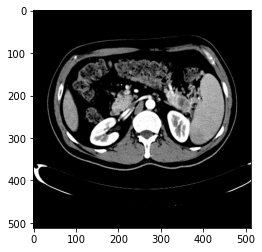

In [16]:
# '../Pytorch-UNet/data/masks/0_mask.jpg'
# https://blog.csdn.net/qq295456059/article/details/51378313
# 灰度图训练时注意图片读入方式，必须加0，反则就变为三通道的了。
img = cv2.imread('../pancreas/backup2-seg-dataset/imgs/0.jpg',0)
plt.imshow(img,cmap='gray')

In [49]:
from PIL import Image
img = Image.open('../Pytorch-UNet/data/imgs/0.jpg')
img.mode

'L'

In [43]:
img = np.array(img)
img.shape

(512, 512, 3)

In [9]:
img = np.expand_dims(img, axis=2)
img.shape

(512, 512, 1)

In [10]:
img.max()

255

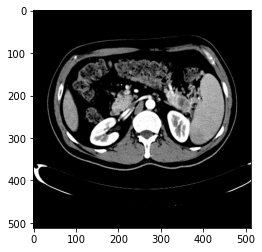

In [11]:
img[0:33,0:245] = 0
plt.imshow(img,cmap='gray')

In [ ]:
import os
import args

parser = argparse.ArgumentParser(description='Train the UNet on images and target masks',
                                 formatter_class=argparse.ArgumentDefaultsHelpFormatter)
parser.add_argument('-e', '--epochs', metavar='E', type=int, default=-1,
                    help='Number of epochs', dest='epochs')
parser.add_argument('-t', '--threshold', metavar='E', type=float, default=0.5,
                    help='threshold for classification', dest='threshold')

parser.parse_args()

path = './data/'

EPOCH = parser.epochs
if EPOCH == -1:
    


command = 'python predict.py -m checkpoints/CP_epoch300.pth --scale 1.0 -i data/imgs/0.jpg -o data/val_result/val_0.jpg -t 0.5'

In [ ]:
import re

regex = re.compile(r'\d+')
epochs_index = [int(regex.findall(name[:-4])[0]) for name in os.listdir('../Pytorch-UNet/checkpoints/')]


# num = int(max(regex.findall(epochs_index)))
# print(num)
max(epochs_index)
